## 0.1 Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

! pip install datasist
from datasist.structdata import detect_outliers

## 0.2 Load Data

In [2]:
df = pd.read_csv('full_data.csv')
df.head()

time  consumption_MWh  total_generation_MWh  natural_gas  \
0  01:01:2018:00:00         27412.81              27412.81      6926.78   
1  01:01:2018:01:00         26324.39              26324.39      6603.44   
2  01:01:2018:02:00         24635.32              24635.32      6040.77   
3  01:01:2018:03:00         23872.12              23872.12      5938.46   
4  01:01:2018:04:00         23194.89              23194.89      5665.41   

   hydro_dam  lignite  hydro_river  coal_imported     wind  solar  ...  \
0    4820.40  5226.32      1900.32        5314.05  1179.51    0.0  ...   
1    3644.32  5277.19      1877.83        5715.61  1148.46    0.0  ...   
2    2711.00  5325.47      1708.49        5701.37  1216.38    0.0  ...   
3    2524.37  5265.91      1662.59        5205.43  1298.11    0.0  ...   
4    2462.71  5282.88      1697.96        4804.19  1220.91    0.0  ...   

   asphaltite_coal  hard_coal  biomass  naphtha  LNG  international  \
0           278.20      189.5   210.96      0.0  0.0          297.0   
1           284.82      205.5   211.67      0.0  0.0          287.0   
2           278.20      201.5   209.89      0.0  0.0          169.0   
3           271.57      211.5   211.24      0.0  0.0          214.0   
4           273.78      307.5   214.31      0.0  0.0          203.0   

   waste_heat  TRY/MWh  USD/MWh  EUR/MWh  
0       92.08   207.60    55.04    45.97  
1       91.14   205.34    54.44    45.47  
2       91.06   164.94    43.73    36.53  
3       91.83   154.52    40.97    34.22  
4       91.23   112.64    29.86    24.95  

[5 rows x 22 columns]

In [3]:
df.columns

Index(['time', 'consumption_MWh', 'total_generation_MWh', 'natural_gas',
       'hydro_dam', 'lignite', 'hydro_river', 'coal_imported', 'wind', 'solar',
       'fuel_oil', 'geothermal', 'asphaltite_coal', 'hard_coal', 'biomass',
       'naphtha', 'LNG', 'international', 'waste_heat', 'TRY/MWh', 'USD/MWh',
       'EUR/MWh'],
      dtype='object')

## 0.3 EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  52584 non-null  object 
 1   consumption_MWh       52584 non-null  float64
 2   total_generation_MWh  52584 non-null  float64
 3   natural_gas           52584 non-null  float64
 4   hydro_dam             52584 non-null  float64
 5   lignite               52584 non-null  float64
 6   hydro_river           52584 non-null  float64
 7   coal_imported         52584 non-null  float64
 8   wind                  52584 non-null  float64
 9   solar                 52584 non-null  float64
 10  fuel_oil              52584 non-null  float64
 11  geothermal            52584 non-null  float64
 12  asphaltite_coal       52584 non-null  float64
 13  hard_coal             52584 non-null  float64
 14  biomass               52584 non-null  float64
 15  naphtha            

In [5]:
df.describe()

consumption_MWh  total_generation_MWh   natural_gas     hydro_dam  \
count     52584.000000          52584.000000  52584.000000  52584.000000   
mean      35166.891649          34399.243138   8725.505190   5614.316871   
std        5743.832244           5272.179656   4027.024572   2846.858883   
min       15333.300000          15333.300000    496.660000    296.690000   
25%       30814.882500          30485.697500   5648.690000   3333.605000   
50%       35063.730000          34438.515000   8863.035000   5362.740000   
75%       39281.595000          38188.935000  11551.372500   7667.975000   
max       55575.020000          51285.690000  19453.650000  15891.780000   

            lignite   hydro_river  coal_imported          wind         solar  \
count  52584.000000  52584.000000   52584.000000  52584.000000  52584.000000   
mean    4901.607249   2219.311611    7128.778313   3137.646356    167.942769   
std      616.084315   1333.785556    1823.970761   1910.953417    340.820824   
min     2189.100000    379.960000     956.350000     42.530000     -1.700000   
25%     4555.622500   1140.782500    5931.242500   1577.745000      0.000000   
50%     4946.670000   1725.255000    7604.270000   2817.655000      3.510000   
75%     5314.530000   3167.205000    8456.725000   4403.705000    115.470000   
max     6984.150000   6103.590000   11352.140000   9737.590000   1547.410000   

           fuel_oil  ...  asphaltite_coal     hard_coal       biomass  \
count  52584.000000  ...     52584.000000  52584.000000  52584.000000   
mean      83.699436  ...       235.883465    415.177407    590.215587   
std       54.734514  ...        82.835939    115.472528    251.158824   
min        0.000000  ...         0.000000     77.500000    202.580000   
25%       37.000000  ...       196.500000    331.500000    359.625000   
50%       71.900000  ...       231.830000    415.015000    543.140000   
75%       98.162500  ...       320.150000    510.540000    852.662500   
max      237.600000  ...       368.720000    692.620000   1039.900000   

       naphtha           LNG  international    waste_heat       TRY/MWh  \
count  52584.0  52584.000000   52584.000000  52584.000000  52584.000000   
mean       0.0      0.018057      52.954873     81.734692    996.139021   
std        0.0      0.167291     360.610536     13.671189   1126.233416   
min        0.0      0.000000   -3130.500000     30.690000      0.000000   
25%        0.0      0.000000    -216.617500     73.120000    280.000000   
50%        0.0      0.000000       0.000000     82.140000    326.815000   
75%        0.0      0.000000     333.000000     91.220000   1699.000000   
max        0.0      1.880000    1648.540000    127.760000   4800.000000   

            USD/MWh       EUR/MWh  
count  52584.000000  52584.000000  
mean      72.190211     65.793224  
std       49.815156     49.431674  
min        0.000000      0.000000  
25%       42.850000     36.090000  
50%       54.350000     48.210000  
75%       84.920000     78.012500  
max      264.170000    271.630000  

[8 rows x 21 columns]

## Maybe there are outlayes in these columns (hydro_river, wind, solar, fuel_oil, LNG, International)

In [6]:
df['time'] = pd.to_datetime(df['time'], format='%d:%m:%Y:%H:%M', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  52584 non-null  datetime64[ns]
 1   consumption_MWh       52584 non-null  float64       
 2   total_generation_MWh  52584 non-null  float64       
 3   natural_gas           52584 non-null  float64       
 4   hydro_dam             52584 non-null  float64       
 5   lignite               52584 non-null  float64       
 6   hydro_river           52584 non-null  float64       
 7   coal_imported         52584 non-null  float64       
 8   wind                  52584 non-null  float64       
 9   solar                 52584 non-null  float64       
 10  fuel_oil              52584 non-null  float64       
 11  geothermal            52584 non-null  float64       
 12  asphaltite_coal       52584 non-null  float64       
 13  hard_coal       

In [7]:
# Extract time-based features
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek      # Monday=0, Sunday=6
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['season'] = df['month'] % 12 // 3 + 1          # 1=Winter, 2=Spring, 3=Summer, 4=Fall

# Optional: create 'date' column for daily-level aggregation (used in clustering)
df['date'] = df['time'].dt.date

# Preview the new columns
df[['time', 'hour', 'day_of_week', 'month', 'year', 'season', 'date']].head()

time  hour  day_of_week  month  year  season        date
0 2018-01-01 00:00:00     0            0      1  2018       1  2018-01-01
1 2018-01-01 01:00:00     1            0      1  2018       1  2018-01-01
2 2018-01-01 02:00:00     2            0      1  2018       1  2018-01-01
3 2018-01-01 03:00:00     3            0      1  2018       1  2018-01-01
4 2018-01-01 04:00:00     4            0      1  2018       1  2018-01-01

## 0.4 Analysis Questions

## 1. What are the hourly, daily, and monthly patterns in electricity consumption?

In [8]:
avg_monthly = df.groupby('month')['consumption_MWh'].mean()
avg_monthly

month
1     35843.967991
2     35383.759295
3     34438.535457
4     32319.647442
5     31904.777298
6     34011.946938
7     38928.340524
8     39685.727668
9     36419.433245
10    32831.252767
11    34209.620306
12    35925.934068
Name: consumption_MWh, dtype: float64

In [9]:
avg_hourly = df.groupby('hour')['consumption_MWh'].mean()
avg_hourly

hour
0     33246.570055
1     31646.914747
2     30506.378759
3     29761.890625
4     29416.719466
5     29193.689941
6     29284.841127
7     30622.287481
8     34439.408608
9     36789.961775
10    37720.380137
11    38403.338777
12    37314.333861
13    37696.155838
14    38418.004158
15    38231.448106
16    38339.524012
17    38498.716372
18    38392.503916
19    38416.930319
20    38316.125299
21    37601.715340
22    36616.341456
23    35131.219393
Name: consumption_MWh, dtype: float64

In [10]:
avg_daily = df.groupby('day_of_week')['consumption_MWh'].mean()
avg_daily

day_of_week
0    35325.736179
1    36231.999921
2    36419.527738
3    36512.130523
4    36181.176540
5    34441.033572
6    31056.637066
Name: consumption_MWh, dtype: float64

Peak consumption is between 10 AM to 8 PM, especially 11 AM–6 PM

Weekdays (Mon–Fri) have higher demand than weekends

Highest consumption months are July and August

## 2. How does electricity demand differ between weekdays and weekends?

In [11]:
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
weekend_avg = df.groupby('is_weekend')['consumption_MWh'].mean()
weekend_avg

is_weekend
0    36134.114181
1    32748.835319
Name: consumption_MWh, dtype: float64

Weekdays (0): 36,134 MWh

Weekends (1): 32,748 MWh

Demand is about 10% lower on weekends

## 3. Are there significant seasonal trends in electricity usage?

In [12]:
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season_name'] = df['season'].map(season_map)
seasonal_avg = df.groupby('season_name')['consumption_MWh'].mean()
seasonal_avg

season_name
Fall      34468.576289
Spring    32893.827377
Summer    37580.375240
Winter    35728.386513
Name: consumption_MWh, dtype: float64

Summer: 37,580 MWh

Winter: 35,728 MWh

Summer > Winter > Fall > Spring

## 4. Which year had the highest average electricity consumption?

In [13]:
avg_year = df.groupby('year')['consumption_MWh'].mean().sort_values(ascending=False)
avg_year

year
2021    37305.333148
2023    37023.165500
2022    36964.542957
2018    33356.452541
2019    33227.058177
2020    33130.377061
Name: consumption_MWh, dtype: float64

2021: 37,305 MWh

2023: 37,023 MWh

The highest average was in 2021

## 5. What % of total electricity generation comes from renewable vs. fossil sources?

In [14]:
fossil = ['natural_gas', 'coal_imported', 'fuel_oil', 'asphaltite_coal', 'hard_coal', 'lignite', 'LNG', 'naphtha']
renewable = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat']

total_gen = df[fossil + renewable].sum().sum()
fossil_share = df[fossil].sum().sum() / total_gen * 100
renewable_share = df[renewable].sum().sum() / total_gen * 100

print(f"{fossil_share:.2f}% fossil")
print(f"{renewable_share:.2f}% renewable")

62.57% fossil
37.43% renewable


## 6. Which renewable source has shown the most growth?

In [15]:
renewable_growth = df.groupby('year')[renewable].sum()
renewable_growth_diff = renewable_growth.loc[2023] - renewable_growth.loc[2018]
renewable_growth_diff.sort_values(ascending=False)


wind           14017362.38
biomass         5819690.22
solar           3784164.00
hydro_dam       3306872.16
geothermal      3234683.57
hydro_river      661865.34
waste_heat       -26324.65
dtype: float64

Wind showed the most growth from 2018 to 2023.



## 7. How often does electricity generation exceed or fall short of consumption?

In [16]:
df['generation_gap'] = df['total_generation_MWh'] - df['consumption_MWh']
over_generation = (df['generation_gap'] > 0).mean() * 100
under_generation = (df['generation_gap'] < 0).mean() * 100

print(f"Percentage of time generation exceeds consumption: {over_generation:.2f}%")
print(f"Percentage of time generation falls short of consumption: {under_generation:.2f}%")

Percentage of time generation exceeds consumption: 4.20%
Percentage of time generation falls short of consumption: 47.85%


## 8. How do electricity prices correlate with demand and sources?

In [17]:
price_corr = df.corr(numeric_only=True)[['TRY/MWh', 'USD/MWh', 'EUR/MWh']].sort_values(by='TRY/MWh', ascending=False)
price_corr


TRY/MWh   USD/MWh   EUR/MWh
TRY/MWh               1.000000  0.937953  0.942196
EUR/MWh               0.942196  0.997792  1.000000
USD/MWh               0.937953  1.000000  0.997792
biomass               0.772530  0.621386  0.618090
year                  0.726440  0.553948  0.552207
international         0.642401  0.539861  0.551452
geothermal            0.417833  0.338994  0.333802
coal_imported         0.362740  0.336914  0.334295
solar                 0.358172  0.265355  0.268717
consumption_MWh       0.320964  0.350165  0.328883
hard_coal             0.317376  0.234519  0.235194
total_generation_MWh  0.264693  0.315773  0.292794
wind                  0.196188  0.131105  0.133872
month                 0.142066  0.096391  0.108961
season                0.074599  0.049346  0.066945
natural_gas           0.067602  0.174740  0.144995
hour                  0.066510  0.106626  0.098628
lignite               0.037321  0.143829  0.130490
waste_heat            0.012865  0.038829  0.031976
day_of_week          -0.040057 -0.061934 -0.057379
is_weekend           -0.048872 -0.074309 -0.069003
LNG                  -0.076485 -0.047206 -0.053208
fuel_oil             -0.090608 -0.073223 -0.071259
hydro_dam            -0.127145 -0.097914 -0.098256
hydro_river          -0.143313 -0.156404 -0.153150
generation_gap       -0.275123 -0.212747 -0.212078
asphaltite_coal      -0.443783 -0.362288 -0.370714
naphtha                    NaN       NaN       NaN

## 9. How has the reliance on each energy source changed from 2018 to 2023?

In [18]:
energy_change_by_year = df.groupby('year')[fossil + renewable].mean()
energy_change_by_year

natural_gas  coal_imported    fuel_oil  asphaltite_coal   hard_coal  \
year                                                                         
2018  10283.698613    7094.666848  163.184301       265.719451  285.882220   
2019   6265.231647    6895.333550  105.784056       265.269563  390.455482   
2020   7749.607826    7111.391878   35.637369       253.059575  430.980944   
2021  12253.430140    6265.539489   38.429685       270.885213  443.024031   
2022   8203.678959    7213.592451   79.276674       179.005194  466.794443   
2023   7600.057646    8192.193297   80.016208       181.314733  473.884023   

          lignite       LNG  naphtha    hydro_dam  hydro_river       solar  \
year                                                                         
2018  5116.567597  0.108394      0.0  4667.335513  2149.645188    6.551253   
2019  5333.149824  0.000000      0.0  7491.348740  2623.583966   21.451678   
2020  4302.084995  0.000000      0.0  6525.588819  2335.308297   47.932729   
2021  4905.869929  0.000000      0.0  4630.314147  1702.417385  176.859444   
2022  5110.437213  0.000000      0.0  5323.985038  2279.396439  316.656862   
2023  4643.176459  0.000000      0.0  5044.832334  2225.200592  438.533445   

             wind     biomass   geothermal  waste_heat  
year                                                    
2018  2255.241364  263.190954   788.308318   79.199919  
2019  2455.739798  359.448858   939.464458   75.258225  
2020  2787.645651  462.839926  1060.608119   79.494370  
2021  3527.486322  673.302987  1153.637252   93.731733  
2022  3945.327017  855.320616  1167.059610   86.535220  
2023  3855.396887  927.539153  1157.564434   76.194822

Observation:

Solar grew from 6 → 438 MWh

Wind from 2,255 → 3,855 MWh

Biomass and Geothermal also grew

Natural gas and coal remained dominant, though fluctuating

## 10. What is the variability of solar and wind throughout the day and year?

In [19]:
solar_hourly_avg = df.groupby('hour')['solar'].mean()
wind_hourly_avg = df.groupby('hour')['wind'].mean()
solar_variability_year = df.groupby('year')['solar'].std()
wind_variability_year = df.groupby('year')['wind'].std()

hourly_avg_table = pd.DataFrame({
    'Average Solar (MWh)': solar_hourly_avg,
    'Average Wind (MWh)': wind_hourly_avg
})

yearly_variability_table = pd.DataFrame({
    'Yearly Solar Std Dev (MWh)': solar_variability_year,
    'Yearly Wind Std Dev (MWh)': wind_variability_year
})

print("Hourly Average Generation (MWh):")
display(hourly_avg_table)

print("\nYearly Generation Variability (Standard Deviation in MWh):")
display(yearly_variability_table)

Hourly Average Generation (MWh):


Average Solar (MWh)  Average Wind (MWh)
hour                                         
0                0.043692         3173.720429
1                0.009051         3094.442387
2                0.002195         3055.300808
3                0.010703         3037.964601
4                0.194683         3032.154021
5                3.178791         3031.006239
6               34.094989         3030.126417
7              136.493784         2970.049626
8              279.609416         2912.784966
9              391.187376         2828.676148
10             450.164445         2809.126011
11             472.244696         2836.665153
12             473.799498         2910.447704
13             464.364299         3005.171150
14             437.667394         3117.141652
15             382.940712         3227.609795
16             283.301141         3335.005308
17             159.453104         3415.866627
18              54.954596         3472.260675
19               6.837010         3489.022287
20               0.055349         3494.105582
21               0.009119         3438.949069
22               0.005486         3350.089439
23               0.004938         3235.826440


Yearly Generation Variability (Standard Deviation in MWh):


Yearly Solar Std Dev (MWh)  Yearly Wind Std Dev (MWh)
year                                                       
2018                   10.705993                1325.841008
2019                   29.918042                1426.280297
2020                   66.214273                1609.041412
2021                  232.706699                1909.684579
2022                  413.867656                2133.833189
2023                  555.977787                2155.899788

Solar:

Peaks at 12 PM (~474 MWh)

Standard deviation grew from 10.7 (2018) to 556 (2023)

Wind:

Flatter curve with evening peaks

Variability grew from 1,325 to 2,156



## 11. How dependent is the system on imported electricity during peak hours (16–21)?

In [20]:
avg_import_peak = df[df['hour'].between(16, 21)]['international'].mean()
avg_import_all = df['international'].mean()

print(f"Average import during peak hours: {avg_import_peak:.2f} MWh")
print(f"Overall average import: {avg_import_all:.2f} MWh")

Average import during peak hours: 14.89 MWh
Overall average import: 52.95 MWh


The system uses less imported electricity during peak times — relies on internal sources.

## 12. Which energy sources are most associated with high pricing periods?

In [21]:
high_price_df = df[df['TRY/MWh'] >= df['TRY/MWh'].quantile(0.90)]
avg_sources_high_price = high_price_df[fossil + renewable].mean().sort_values(ascending=False)

avg_sources_high_price

natural_gas        10171.450550
coal_imported       8864.441879
lignite             5003.822137
hydro_dam           4589.282307
wind                3500.756988
hydro_river         1363.417507
geothermal          1157.418403
biomass              896.047313
hard_coal            460.824489
solar                336.022839
asphaltite_coal      170.043482
waste_heat            80.521076
fuel_oil              76.078564
LNG                    0.000000
naphtha                0.000000
dtype: float64

Fossil fuels dominate high-price periods.

## 13. How do electricity prices correlate with demand levels?

In [22]:
corr_demand_price = df[['consumption_MWh', 'TRY/MWh']].corr().iloc[0, 1]
corr_demand_usd = df[['consumption_MWh', 'USD/MWh']].corr().iloc[0, 1]
corr_demand_eur = df[['consumption_MWh', 'EUR/MWh']].corr().iloc[0, 1]
print(f"Correlation between Consumption and TRY/MWh: {corr_demand_price:.2f}")
print(f"Correlation between Consumption and USD/MWh: {corr_demand_usd:.2f}")
print(f"Correlation between Consumption and EUR/MWh: {corr_demand_eur:.2f}")

Correlation between Consumption and TRY/MWh: 0.32
Correlation between Consumption and USD/MWh: 0.35
Correlation between Consumption and EUR/MWh: 0.33


## 14. Is there a seasonal or annual trend in electricity prices?

In [23]:
seasonal_price_avg = df.groupby('season')['TRY/MWh'].mean()
annual_price_avg = df.groupby('year')['TRY/MWh'].mean()

print("Average TRY/MWh by Season:")
display(seasonal_price_avg)

print("\nAverage TRY/MWh by Year:")
display(annual_price_avg)

Average TRY/MWh by Season:


season
1    1031.858132
2     769.885790
3     971.949472
4    1213.941906
Name: TRY/MWh, dtype: float64


Average TRY/MWh by Year:


year
2018     231.636362
2019     260.320358
2020     278.716692
2021     508.102013
2022    2510.721584
2023    2189.302656
Name: TRY/MWh, dtype: float64

Prices exploded in 2022–2023 and peak in Fall/Winter

## 15. How do currency fluctuations affect local pricing in TRY?

In [24]:
currency_corr = df[['TRY/MWh', 'USD/MWh', 'EUR/MWh']].corr()

print("Correlation between TRY/MWh and other currencies:")
display(currency_corr)

Correlation between TRY/MWh and other currencies:


TRY/MWh   USD/MWh   EUR/MWh
TRY/MWh  1.000000  0.937953  0.942196
USD/MWh  0.937953  1.000000  0.997792
EUR/MWh  0.942196  0.997792  1.000000

TRY/MWh price moves almost identically with foreign prices

## 16. What are the strongest predictors of electricity price (TRY/MWh)?

In [25]:
top_price_predictors = df.corr(numeric_only=True)['TRY/MWh'].sort_values(ascending=False).head(10)
top_price_predictors

TRY/MWh            1.000000
EUR/MWh            0.942196
USD/MWh            0.937953
biomass            0.772530
year               0.726440
international      0.642401
geothermal         0.417833
coal_imported      0.362740
solar              0.358172
consumption_MWh    0.320964
Name: TRY/MWh, dtype: float64

Price is driven by currency, imports, and some renewables (biomass, solar).

## 17. Are there any surprising negative or positive correlations with price (TRY/MWh)?

In [26]:
top_neg_correlations = df.corr(numeric_only=True)['TRY/MWh'].sort_values().head(5)
top_price_predictors

TRY/MWh            1.000000
EUR/MWh            0.942196
USD/MWh            0.937953
biomass            0.772530
year               0.726440
international      0.642401
geothermal         0.417833
coal_imported      0.362740
solar              0.358172
consumption_MWh    0.320964
Name: TRY/MWh, dtype: float64

Hydro and fuel oil are negatively correlated with price.

## 0.5 Visualization

In [27]:
# Hourly Electricity Consumption
hourly_consumption = df.groupby('hour')['consumption_MWh'].mean().reset_index()
fig_hourly = px.line(hourly_consumption, x='hour', y='consumption_MWh',
                     title='Average Hourly Electricity Consumption (MWh)',
                     labels={'consumption_MWh': 'Avg Consumption (MWh)', 'hour': 'Hour of Day'})
fig_hourly.show()

This line graph reveals the average electricity consumption by hour of the day.

**Insight**:

Consumption rises sharply from 6 AM and peaks between 11 AM and 6 PM,

*   Consumption rises sharply from 6 AM and peaks between 11 AM and 6 PM,
reflecting typical daytime and business activity.

*   Demand tapers off during nighttime hours.



In [28]:
# Monthly Electricity Consumption
monthly_consumption = df.groupby('month')['consumption_MWh'].mean().reset_index()
fig_monthly = px.bar(monthly_consumption, x='month', y='consumption_MWh',
                     title='Average Monthly Electricity Consumption',
                     labels={'month': 'Month', 'consumption_MWh': 'Avg Consumption (MWh)'})
fig_monthly.show()

Average monthly electricity demand throughout the year.

**Insight**:



*   Peaks appear in July and August, likely due to air conditioning use.

*   A second smaller peak may occur in January or February due to winter heating.

*   This confirms seasonal effects on demand.


In [29]:
# Weekday vs Weekend Electricity Consumption
df['is_weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
weekend_consumption = df.groupby('is_weekend')['consumption_MWh'].mean().reset_index()
fig_weekend = px.bar(weekend_consumption, x='is_weekend', y='consumption_MWh',
                     title='Weekday vs Weekend Electricity Consumption',
                     labels={'is_weekend': 'Day Type', 'consumption_MWh': 'Avg Consumption (MWh)'})
fig_weekend.show()

Average electricity consumption on weekdays versus weekends.

**Insight**:

*   Weekdays show higher demand, consistent with industrial and commercial activity.

*  Weekends show a drop, reflecting residential-dominant patterns.


In [30]:
# Seasonal Electricity Consumption
df['season_name'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
seasonal_consumption = df.groupby('season_name')['consumption_MWh'].mean().reset_index()
fig_seasonal = px.bar(seasonal_consumption, x='season_name', y='consumption_MWh',
                      title='Average Seasonal Electricity Consumption',
                      labels={'season_name': 'Season', 'consumption_MWh': 'Avg Consumption (MWh)'})
fig_seasonal.show()

Compares average consumption across the four seasons.

**Insight**:

*   Summer and Winter have the highest demand due to cooling and heating.

*   Spring has the lowest usage — likely due to mild weather and fewer appliances in use.


In [31]:
# Fossil vs Renewable Share
fossil_total = df[fossil].sum().sum()
renewable_total = df[renewable].sum().sum()

fig_fossil_vs_renewable = px.pie(
    values=[fossil_total, renewable_total],
    names=['Fossil', 'Renewable'],
    title='Electricity Generation Share: Fossil vs Renewable'
)
fig_fossil_vs_renewable.show()

Total electricity generation split between fossil and renewable sources.

**Insight**:



*   Fossil fuels dominate (~63%) the energy mix.

*   Renewables account for ~37%, with room to grow; highlighting the opportunity for green investment.


In [32]:
# Change in Energy Source by Year
energy_sources = fossil + renewable
energy_by_year = df.groupby('year')[energy_sources].mean().reset_index()

fig_energy_by_year = px.bar(
    energy_by_year,
    x='year',
    y=energy_sources,
    title='Average Electricity Generation by Source (2018–2023)',
    labels={'value': 'Avg MWh', 'variable': 'Energy Source'},
    barmode='stack'
)
fig_energy_by_year.show()

Average generation from each energy source between 2018 and 2023.

**Insight**:



*   Renewables like solar and wind have grown steadily.

*   Coal and natural gas remain heavy contributors.

*   This chart captures how energy strategy is shifting slowly.


In [33]:
# Solar/Wind Hourly Patterns
solar_hourly = df.groupby('hour')['solar'].mean().reset_index()
wind_hourly = df.groupby('hour')['wind'].mean().reset_index()

fig_solar_wind_hourly = go.Figure()
fig_solar_wind_hourly.add_trace(go.Scatter(x=solar_hourly['hour'], y=solar_hourly['solar'],
                                           mode='lines+markers', name='Solar'))
fig_solar_wind_hourly.add_trace(go.Scatter(x=wind_hourly['hour'], y=wind_hourly['wind'],
                                           mode='lines+markers', name='Wind'))

fig_solar_wind_hourly.update_layout(
    title='Average Hourly Generation: Solar vs Wind',
    xaxis_title='Hour of Day',
    yaxis_title='Avg Generation (MWh)',
    legend_title='Source'
)
fig_solar_wind_hourly.show()

The average generation of solar and wind energy by hour of day.

**Insight**:



*   Solar peaks at noon and disappears at night.

*   Wind is more stable but has a slight peak in the evening.

*   Together, they suggest when renewable energy is most available.



In [34]:
# Year-over-Year Growth in Renewable Sources
renewable_sources_selected = ['solar', 'wind', 'hydro_dam', 'hydro_river']
renewable_by_year = df.groupby('year')[renewable_sources_selected].mean().reset_index()

fig_renewable_growth = px.bar(
    renewable_by_year,
    x='year',
    y=renewable_sources_selected,
    barmode='group',
    title='Year-over-Year Growth in Renewable Sources',
    labels={'value': 'Avg Generation (MWh)', 'variable': 'Energy Source'}
)
fig_renewable_growth.show()

This grouped bar chart illustrates the average annual generation from key renewable sources — solar, wind, hydro dam, and hydro river — between 2018 and 2023.

**Insight**:



*   Wind energy shows the most consistent and significant growth year over year.

*   Solar energy has increased dramatically since 2020, reflecting investment in photovoltaic infrastructure.

*   Hydro (dam and river) shows variable performance depending on rainfall and seasonal water flow.




In [35]:
# Annual Electricity Price (TRY/MWh)
annual_price = df.groupby('year')['TRY/MWh'].mean().reset_index()

fig_annual_price = px.bar(
    annual_price,
    x='year',
    y='TRY/MWh',
    title='Average Annual Electricity Price (TRY/MWh)',
    labels={'TRY/MWh': 'Price (TRY)', 'year': 'Year'}
)
fig_annual_price.show()

Tracks the average electricity price per year in TRY.

**Insight**:

*   Prices were stable until 2021, then skyrocketed in 2022–2023 — likely due to inflation, currency devaluation, or energy crisis.


In [36]:
# Correlation Heatmap
correlation_matrix = df.corr(numeric_only=True).round(2)

fig_corr_heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='Viridis'))

fig_corr_heatmap.update_layout(
    title='Correlation Heatmap of Numerical Features',
    xaxis_nticks=36
)
fig_corr_heatmap.show()

Visual matrix of correlations between all numerical variables.

**Insight**:



*   TRY/MWh is highly correlated with USD/MWh, EUR/MWh, and Biomass generation.

*   Negative correlations with hydro and imbalance (surplus reduces price).

*   Useful for feature selection in ML models.


In [37]:
# Top Energy Sources in High Price Hours
high_price_threshold = df['TRY/MWh'].quantile(0.90)
high_price_df = df[df['TRY/MWh'] >= high_price_threshold]
avg_sources_high_price = high_price_df[fossil + renewable].mean().sort_values(ascending=False).reset_index()
avg_sources_high_price.columns = ['Source', 'Avg MWh']

fig_high_price_sources = px.bar(
    avg_sources_high_price.head(10),
    x='Avg MWh',
    y='Source',
    orientation='h',
    title='Top Energy Sources During High Price Hours'
)
fig_high_price_sources.show()

The top 10 sources contributing the most during high price periods.

**Insight**:



*   Natural gas and imported coal dominate expensive hours.

*   High reliance on these sources drives up prices, while renewables contribute less during peaks.



## 0.6 Data Preprocessing

In [38]:
# Handling Missing Values
df.isna().sum()

time                    0
consumption_MWh         0
total_generation_MWh    0
natural_gas             0
hydro_dam               0
lignite                 0
hydro_river             0
coal_imported           0
wind                    0
solar                   0
fuel_oil                0
geothermal              0
asphaltite_coal         0
hard_coal               0
biomass                 0
naphtha                 0
LNG                     0
international           0
waste_heat              0
TRY/MWh                 0
USD/MWh                 0
EUR/MWh                 0
hour                    0
day_of_week             0
month                   0
year                    0
season                  0
date                    0
is_weekend              0
season_name             0
generation_gap          0
dtype: int64

In [39]:
# Drop unwanted columns
df_copy = df.copy()

In [40]:
df.drop(columns=['date', 'USD/MWh', 'EUR/MWh','time', 'naphtha', 'LNG', 'is_weekend', 'season_name'], axis = 1, inplace=True, errors='ignore')
df.columns

Index(['consumption_MWh', 'total_generation_MWh', 'natural_gas', 'hydro_dam',
       'lignite', 'hydro_river', 'coal_imported', 'wind', 'solar', 'fuel_oil',
       'geothermal', 'asphaltite_coal', 'hard_coal', 'biomass',
       'international', 'waste_heat', 'TRY/MWh', 'hour', 'day_of_week',
       'month', 'year', 'season', 'generation_gap'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   consumption_MWh       52584 non-null  float64
 1   total_generation_MWh  52584 non-null  float64
 2   natural_gas           52584 non-null  float64
 3   hydro_dam             52584 non-null  float64
 4   lignite               52584 non-null  float64
 5   hydro_river           52584 non-null  float64
 6   coal_imported         52584 non-null  float64
 7   wind                  52584 non-null  float64
 8   solar                 52584 non-null  float64
 9   fuel_oil              52584 non-null  float64
 10  geothermal            52584 non-null  float64
 11  asphaltite_coal       52584 non-null  float64
 12  hard_coal             52584 non-null  float64
 13  biomass               52584 non-null  float64
 14  international         52584 non-null  float64
 15  waste_heat         

In [42]:
# Handle Outliers
indices = detect_outliers(df, 0, df.select_dtypes(include='number'))
df.drop(indices, inplace=True)

## 0.7 Split input and output

In [43]:
X = df.drop(columns=['TRY/MWh'], axis=1)
y = df['TRY/MWh']

In [44]:
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

consumption_MWh  total_generation_MWh  natural_gas  hydro_dam  lignite  \
0         27412.81              27412.81      6926.78    4820.40  5226.32   
1         26324.39              26324.39      6603.44    3644.32  5277.19   
2         24635.32              24635.32      6040.77    2711.00  5325.47   
3         23872.12              23872.12      5938.46    2524.37  5265.91   
4         23194.89              23194.89      5665.41    2462.71  5282.88   

   hydro_river  coal_imported     wind  solar  fuel_oil  ...  hard_coal  \
0      1900.32        5314.05  1179.51    0.0    176.60  ...      189.5   
1      1877.83        5715.61  1148.46    0.0    174.20  ...      205.5   
2      1708.49        5701.37  1216.38    0.0    177.91  ...      201.5   
3      1662.59        5205.43  1298.11    0.0    171.50  ...      211.5   
4      1697.96        4804.19  1220.91    0.0    165.00  ...      307.5   

   biomass  international  waste_heat  hour  day_of_week  month  year  season  \
0   210.96          297.0       92.08     0            0      1  2018       1   
1   211.67          287.0       91.14     1            0      1  2018       1   
2   209.89          169.0       91.06     2            0      1  2018       1   
3   211.24          214.0       91.83     3            0      1  2018       1   
4   214.31          203.0       91.23     4            0      1  2018       1   

   generation_gap  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 22 columns]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34456 entries, 0 to 52582
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   consumption_MWh       34456 non-null  float64
 1   total_generation_MWh  34456 non-null  float64
 2   natural_gas           34456 non-null  float64
 3   hydro_dam             34456 non-null  float64
 4   lignite               34456 non-null  float64
 5   hydro_river           34456 non-null  float64
 6   coal_imported         34456 non-null  float64
 7   wind                  34456 non-null  float64
 8   solar                 34456 non-null  float64
 9   fuel_oil              34456 non-null  float64
 10  geothermal            34456 non-null  float64
 11  asphaltite_coal       34456 non-null  float64
 12  hard_coal             34456 non-null  float64
 13  biomass               34456 non-null  float64
 14  international         34456 non-null  float64
 15  waste_heat            34

##  0.8 Split data into train and test

In [47]:
y_binned = pd.cut(y, bins=10, labels=False, include_lowest=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_binned)

#print("Train Bin Distribution:")
#print(np.bincount(y_binned[X_train.index]))

#print("\nTest Bin Distribution:")
#print(np.bincount(y_binned[X_test.index]))

## 0.9 Scaling

In [49]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

## 0.10 ML models

In [51]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("📊 Linear Regression Results:")
print("R² Score:", round(r2, 4))
print("MAE:", round(mae, 2), "TRY")
print("RMSE:", round(rmse, 2), "TRY")

📊 Linear Regression Results:
R² Score: 0.8315
MAE: 239.6 TRY
RMSE: 350.63 TRY


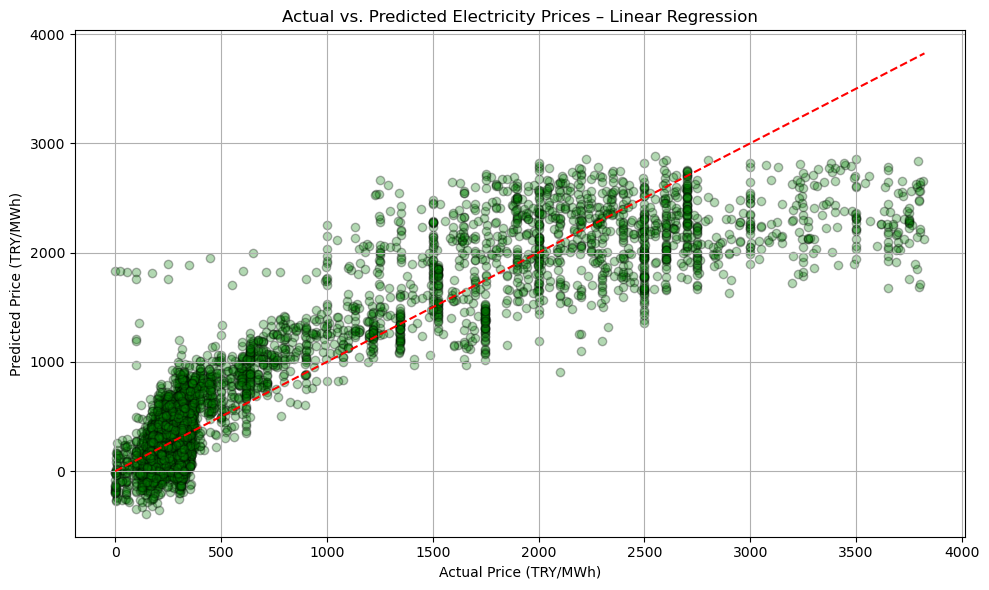

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, color='green', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (TRY/MWh)")
plt.ylabel("Predicted Price (TRY/MWh)")
plt.title("Actual vs. Predicted Electricity Prices – Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.savefig("lr_actual_vs_predicted.png")
plt.show()

Interpretation:
Predictions follow the red identity line fairly well, indicating decent model performance.

However, there's more scatter compared to Random Forest — especially at higher prices — suggesting:

  Underfitting on complex patterns

  Less accuracy for extreme values

In [53]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print("R² Score:", round(r2_rf, 4))
print("MAE:", round(mae_rf, 2), "TRY")
print("RMSE:", round(rmse_rf, 2), "TRY")

Random Forest Regression Results:
R² Score: 0.9752
MAE: 54.0 TRY
RMSE: 134.53 TRY


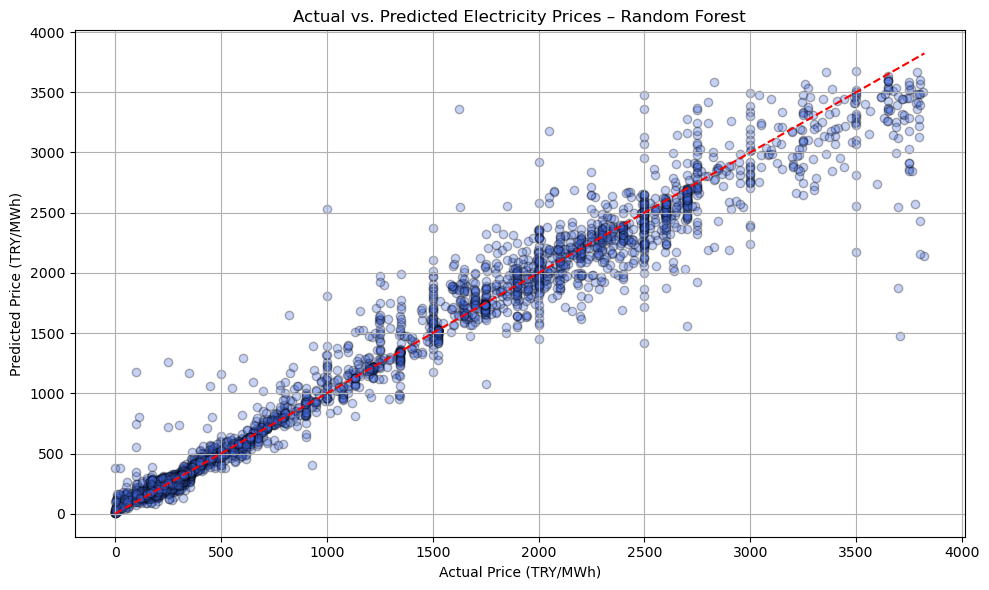

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='royalblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (TRY/MWh)")
plt.ylabel("Predicted Price (TRY/MWh)")
plt.title("Actual vs. Predicted Electricity Prices – Random Forest")
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_actual_vs_predicted.png")
plt.show()

The red dashed line shows perfect prediction (Predicted = Actual).

Blue dots represent your model’s predictions.

**Interpretation**:
Most points are very close to the red line → strong predictive accuracy.

Slight variance at extreme values, but overall fit is excellent.

Confirms Random Forest generalizes well to new data.

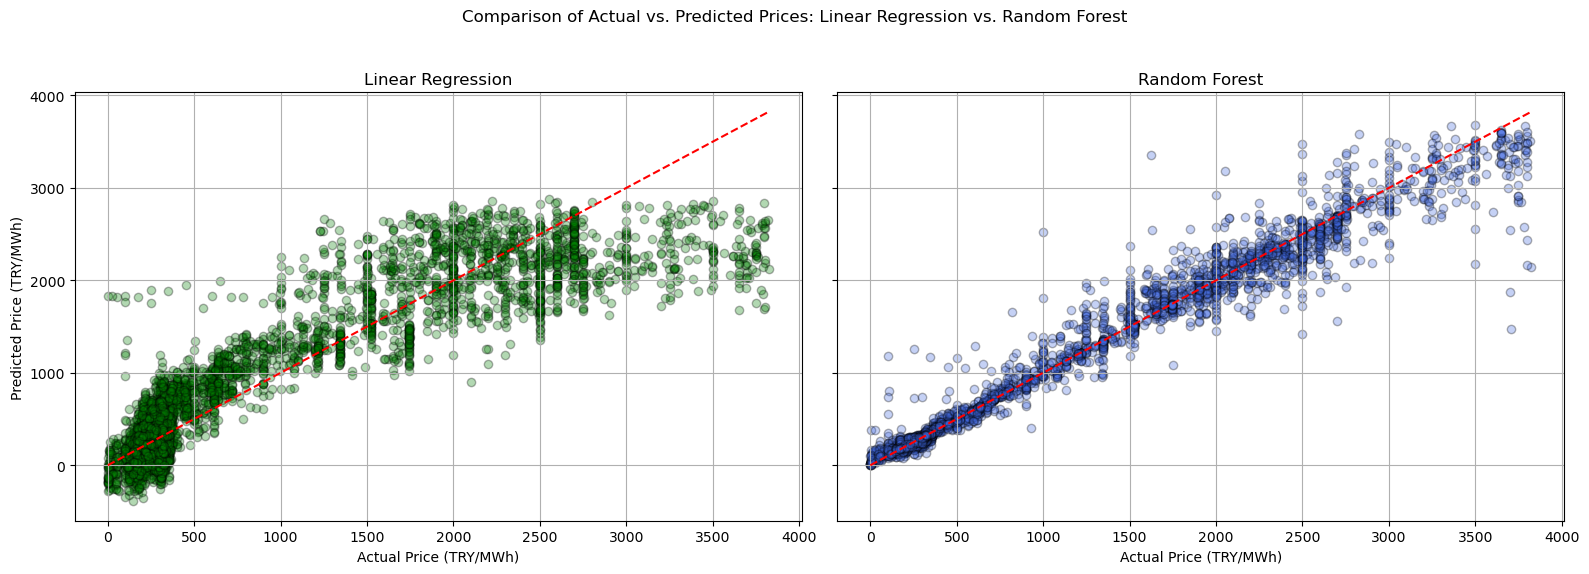

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Linear Regression plot
axes[0].scatter(y_test, y_pred_lr, alpha=0.3, color='green', edgecolors='k')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Linear Regression")
axes[0].set_xlabel("Actual Price (TRY/MWh)")
axes[0].set_ylabel("Predicted Price (TRY/MWh)")
axes[0].grid(True)

# Random Forest plot
axes[1].scatter(y_test, y_pred_rf, alpha=0.3, color='royalblue', edgecolors='k')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Actual Price (TRY/MWh)")
axes[1].grid(True)

plt.suptitle("Comparison of Actual vs. Predicted Prices: Linear Regression vs. Random Forest")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("comparison_lr_vs_rf.png")
plt.show()

Left: Linear Regression
*   More scatter
*   Weaker fit, especially at high prices

Right: Random Forest
*   Points tightly follow the red identity line
*   Much better accuracy across all price levels


In [1]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

st.set_page_config(
    page_title="Powering Sustainability",
    layout="wide",
    page_icon="🔋"
)

@st.cache_data
def load_data():
    return pd.read_csv("cleaned_data.csv")

@st.cache_resource
def load_model():
    model = joblib.load("random_forest_model.pkl")
    scaler = joblib.load("scaler.pkl")
    return model, scaler

cleaned_data = load_data()
rf, scaler = load_model()

st.sidebar.title("🔌 Navigation")
selection = st.sidebar.radio("Go to", [
    "Project Overview",
    "Visual Explorations",
    "Model Performance",
    "Feature Importance"
])

def show_overview(df):
    st.title("🔋 Powering Sustainability")
    st.markdown("""
    ### Forecasting Electricity Prices and Renewable Energy Trends (2018–2023)

    This dashboard uses machine learning and data visualization to explore electricity pricing and generation trends in Turkey.

    **Goals:**
    - Forecast electricity prices using ML models
    - Understand consumption and seasonal usage patterns
    - Evaluate the impact of renewable energy sources
    - Provide insights for sustainability-focused energy planning

    **Dataset:** Hourly electricity consumption, generation by source, and market prices (TRY, USD, EUR) from 2018 to 2023.
    """)

    st.subheader("📊 Sample of Cleaned Dataset")
    st.dataframe(df.head())

    st.subheader("📌 Dataset Summary")
    st.markdown(f"**Total records:** {df.shape[0]}")
    st.markdown(f"**Total features:** {df.shape[1]}")

    st.markdown("---")
    st.markdown("Developed with ❤️ using Streamlit")

def show_visuals(df):
    st.title("📊 Visual Explorations")
    st.markdown("Explore electricity demand, generation sources, and pricing patterns interactively.")

    # Monthly Consumption
    st.subheader("🔌 Monthly Electricity Consumption")
    monthly = df.groupby('month')['consumption_MWh'].mean().reset_index()
    fig_monthly = px.bar(monthly, x='month', y='consumption_MWh',
                         labels={'month': 'Month', 'consumption_MWh': 'Average Consumption (MWh)'})
    st.plotly_chart(fig_monthly, use_container_width=True)

    # NEW: Hourly Consumption
    st.subheader("⏰ Hourly Electricity Consumption")
    hourly_consumption = df.groupby('hour')['consumption_MWh'].mean().reset_index()
    fig_hourly = px.line(hourly_consumption, x='hour', y='consumption_MWh',
                         title='Average Hourly Electricity Consumption (MWh)',
                         labels={'consumption_MWh': 'Avg Consumption (MWh)', 'hour': 'Hour of Day'})
    st.plotly_chart(fig_hourly, use_container_width=True)

    # NEW: Weekday vs Weekend
    if 'day_of_week' in df.columns:
        df['is_weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
        weekend_consumption = df.groupby('is_weekend')['consumption_MWh'].mean().reset_index()
        st.subheader("📅 Weekday vs Weekend Electricity Consumption")
        fig_weekend = px.bar(weekend_consumption, x='is_weekend', y='consumption_MWh',
                             title='Weekday vs Weekend Electricity Consumption',
                             labels={'is_weekend': 'Day Type', 'consumption_MWh': 'Avg Consumption (MWh)'})
        st.plotly_chart(fig_weekend, use_container_width=True)

    # NEW: Seasonal Consumption
    if 'season' in df.columns:
        df['season_name'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
        seasonal_consumption = df.groupby('season_name')['consumption_MWh'].mean().reset_index()
        st.subheader("🍂 Seasonal Electricity Consumption")
        fig_seasonal = px.bar(seasonal_consumption, x='season_name', y='consumption_MWh',
                              title='Average Seasonal Electricity Consumption',
                              labels={'season_name': 'Season', 'consumption_MWh': 'Avg Consumption (MWh)'})
        st.plotly_chart(fig_seasonal, use_container_width=True)

    # Renewable vs Fossil Share
    st.subheader("⚡ Renewable vs Fossil Generation Share")
    fossil_cols = ['natural_gas', 'coal_imported', 'fuel_oil', 'asphaltite_coal', 'hard_coal']
    renewable_cols = ['solar', 'wind', 'hydro_dam', 'hydro_river', 'biomass', 'geothermal', 'waste_heat']

    fossil_cols = [col for col in fossil_cols if col in df.columns]
    renewable_cols = [col for col in renewable_cols if col in df.columns]

    total_renewable = df[renewable_cols].sum().sum()
    total_fossil = df[fossil_cols].sum().sum()

    fig_pie = px.pie(names=['Fossil', 'Renewable'],
                     values=[total_fossil, total_renewable],
                     title="Electricity Generation Share")
    st.plotly_chart(fig_pie, use_container_width=True)

    # Solar & Wind by Hour
    st.subheader("🌞 Solar and Wind Generation by Hour")
    hourly = df.groupby('hour')[[col for col in ['solar', 'wind'] if col in df.columns]].mean().reset_index()
    fig_hour = px.line(hourly, x='hour', y=hourly.columns[1:],
                       labels={'value': 'Avg Generation (MWh)', 'hour': 'Hour'})
    st.plotly_chart(fig_hour, use_container_width=True)

    # Annual Price Trends
    st.subheader("💸 Annual Electricity Prices (TRY/MWh)")
    annual = df.groupby('year')['TRY/MWh'].mean().reset_index()
    fig_price = px.line(annual, x='year', y='TRY/MWh', markers=True,
                        labels={'TRY/MWh': 'Avg Price (TRY/MWh)'})
    st.plotly_chart(fig_price, use_container_width=True)

def show_model_results(df, rf_model, scaler):
    st.title("🎯 Model Performance")
    st.markdown("Evaluate and compare multiple models on electricity price prediction.")

    X = df.drop(columns=['TRY/MWh'])
    y = df['TRY/MWh']
    X = X.select_dtypes(include=[np.number])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)

    y_pred_rf = rf_model.predict(X_test_scaled)

    r2_lr = r2_score(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

    r2_rf = r2_score(y_test, y_pred_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

    model_option = st.selectbox("Choose Model to View:", ["Linear Regression", "Random Forest", "Compare Both"])

    if model_option == "Linear Regression":
        st.subheader("🔹 Linear Regression Results")
        st.metric("R² Score", f"{r2_lr:.3f}")
        st.metric("MAE (TRY)", f"{mae_lr:.2f}")
        st.metric("RMSE (TRY)", f"{rmse_lr:.2f}")

        st.subheader("📈 Actual vs Predicted (Linear Regression)")
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.scatter(y_test, y_pred_lr, alpha=0.4, edgecolor='k', color='green')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        ax.set_xlabel("Actual Price (TRY/MWh)")
        ax.set_ylabel("Predicted Price (TRY/MWh)")
        ax.set_title("Actual vs Predicted Prices – Linear Regression")
        ax.grid(True)
        st.pyplot(fig)

    elif model_option == "Random Forest":
        st.subheader("🔸 Random Forest Results")
        st.metric("R² Score", f"{r2_rf:.3f}")
        st.metric("MAE (TRY)", f"{mae_rf:.2f}")
        st.metric("RMSE (TRY)", f"{rmse_rf:.2f}")

        st.subheader("📈 Actual vs Predicted (Random Forest)")
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.scatter(y_test, y_pred_rf, alpha=0.4, edgecolor='k', color='royalblue')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        ax.set_xlabel("Actual Price (TRY/MWh)")
        ax.set_ylabel("Predicted Price (TRY/MWh)")
        ax.set_title("Actual vs Predicted Prices – Random Forest")
        ax.grid(True)
        st.pyplot(fig)

    else:
        st.subheader("🔍 Comparison of Models")
        comparison_df = pd.DataFrame({
            "Model": ["Random Forest", "Linear Regression"],
            "R²": [r2_rf, r2_lr],
            "MAE": [mae_rf, mae_lr],
            "RMSE": [rmse_rf, rmse_lr]
        })
        st.dataframe(comparison_df)

        fig, ax = plt.subplots(figsize=(8, 5))
        ax.scatter(y_test, y_pred_rf, alpha=0.4, edgecolor='k', label='Random Forest', color='royalblue')
        ax.scatter(y_test, y_pred_lr, alpha=0.4, edgecolor='gray', label='Linear Regression', color='green')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
        ax.set_xlabel("Actual Price (TRY/MWh)")
        ax.set_ylabel("Predicted Price (TRY/MWh)")
        ax.set_title("Actual vs Predicted – Model Comparison")
        ax.legend()
        ax.grid(True)
        st.pyplot(fig)

def show_feature_importance(df, model):
    st.title("🧠 Feature Importance")
    st.markdown("Understanding which features most influence electricity price predictions.")

    X = df.drop(columns=['TRY/MWh'])
    X = X.select_dtypes(include=[np.number])
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    sorted_features = np.array(X.columns)[indices]
    sorted_importances = importances[indices]

    # Interactive Top-N slider
    st.subheader("🎯 Select Top N Features")
    top_n = st.slider("Select number of top features to display:", min_value=5, max_value=len(sorted_features), value=15)

    # Top-N Bar Chart
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(sorted_features[:top_n][::-1], sorted_importances[:top_n][::-1], color='skyblue')
    ax.set_xlabel("Importance")
    ax.set_title(f"Top {top_n} Most Important Features")
    st.pyplot(fig)

    # Cumulative Importance Plot
    st.subheader("📈 Cumulative Feature Importance")
    cumulative_importance = np.cumsum(sorted_importances)
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(range(1, len(cumulative_importance)+1), cumulative_importance, marker='o')
    ax.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
    ax.set_xlabel("Number of Features")
    ax.set_ylabel("Cumulative Importance")
    ax.set_title("Cumulative Feature Importance")
    ax.grid(True)
    ax.legend()
    st.pyplot(fig)

    # Correlation Heatmap of Top-N
    st.subheader("🧱 Correlation Heatmap of Top Features")
    selected_top = sorted_features[:top_n]
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(df[selected_top].corr(), annot=True, cmap="coolwarm", ax=ax)
    ax.set_title("Correlation Heatmap of Top Features")
    st.pyplot(fig)

    # Show raw data (optional)
    if st.checkbox("📋 Show full importance table"):
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        st.dataframe(importance_df.reset_index(drop=True))

# Render page
if selection == "Project Overview":
    show_overview(cleaned_data)
elif selection == "Visual Explorations":
    show_visuals(cleaned_data)
elif selection == "Model Performance":
    show_model_results(cleaned_data, rf, scaler)
elif selection == "Feature Importance":
    show_feature_importance(cleaned_data, rf)

Overwriting app.py


In [2]:
! streamlit run app.py

^C
